<a href="https://colab.research.google.com/github/lauraluebbert/PhD_thesis/blob/main/Chapter1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Chapter 1 - Introduction
## From Bench to Computer - Figure 2
The following overview of scRNAseq tools was downloaded from the [scRNA-tools](https://www.scrna-tools.org/table) website on Februaray 2nd, 2024:

In [2]:
# Downlaod copy of database stored on GitHub
!wget https://raw.githubusercontent.com/lauraluebbert/PhD_thesis/main/files/2-4-2024_scRNA_tools.csv

--2024-02-10 20:16:00--  https://raw.githubusercontent.com/lauraluebbert/PhD_thesis/main/files/2-4-2024_scRNA_tools.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172095 (168K) [text/plain]
Saving to: ‘2-4-2024_scRNA_tools.csv.1’

2-4-2024_scRNA_tool 100%[===================>] 168.06K  --.-KB/s    in 0.03s   

2024-02-10 20:16:01 (5.34 MB/s) - ‘2-4-2024_scRNA_tools.csv.1’ saved [172095/172095]



In [3]:
tool_df = pd.read_csv("2-4-2024_scRNA_tools.csv")
tool_df

,Name,Platform,DOIs,Citations,License,Categories
0,STAR,C/C++,"10.1093/bioinformatics/bts635, 10.1101/2021.05...",31877,MIT,"Alignment, Quantification, UMIs"
1,Seurat,R,"10.1016/j.cell.2019.05.031, 10.1016/j.cell.202...",29135,GPL-3.0,"Clustering, Differential Expression, Dimension..."
2,Monocle,R,"10.1038/nbt.2859, 10.1038/nmeth.4150, 10.1038/...",7870,Artistic-2.0,"Clustering, Differential Expression, Dimension..."
3,salmon,C++,"10.1038/nmeth.4197, 10.1093/bioinformatics/bta...",6989,GPL-3.0,"Quantification, UMIs"
4,kallisto,C/C++,"10.1038/nbt.3519, 10.1038/s41587-021-00870-2, ...",6986,BSD-2-Clause,"Quantification, UMIs"
...,...,...,...,...,...,...
1691,VarTrix,Rust,NaN,'-,MIT,"Alignment, Variants"
1692,VDJdive,R,NaN,'-,Artistic-2.0,"Immune, Integration, Visualisation"
1693,velociraptor,R/Python,NaN,'-,MIT,"Dimensionality Reduction, Ordering"
1694,Vitessce,Javascript,NaN,'-,MIT,"Interactive, Visualisation"


Plot histogram of the number of citations for each tool:

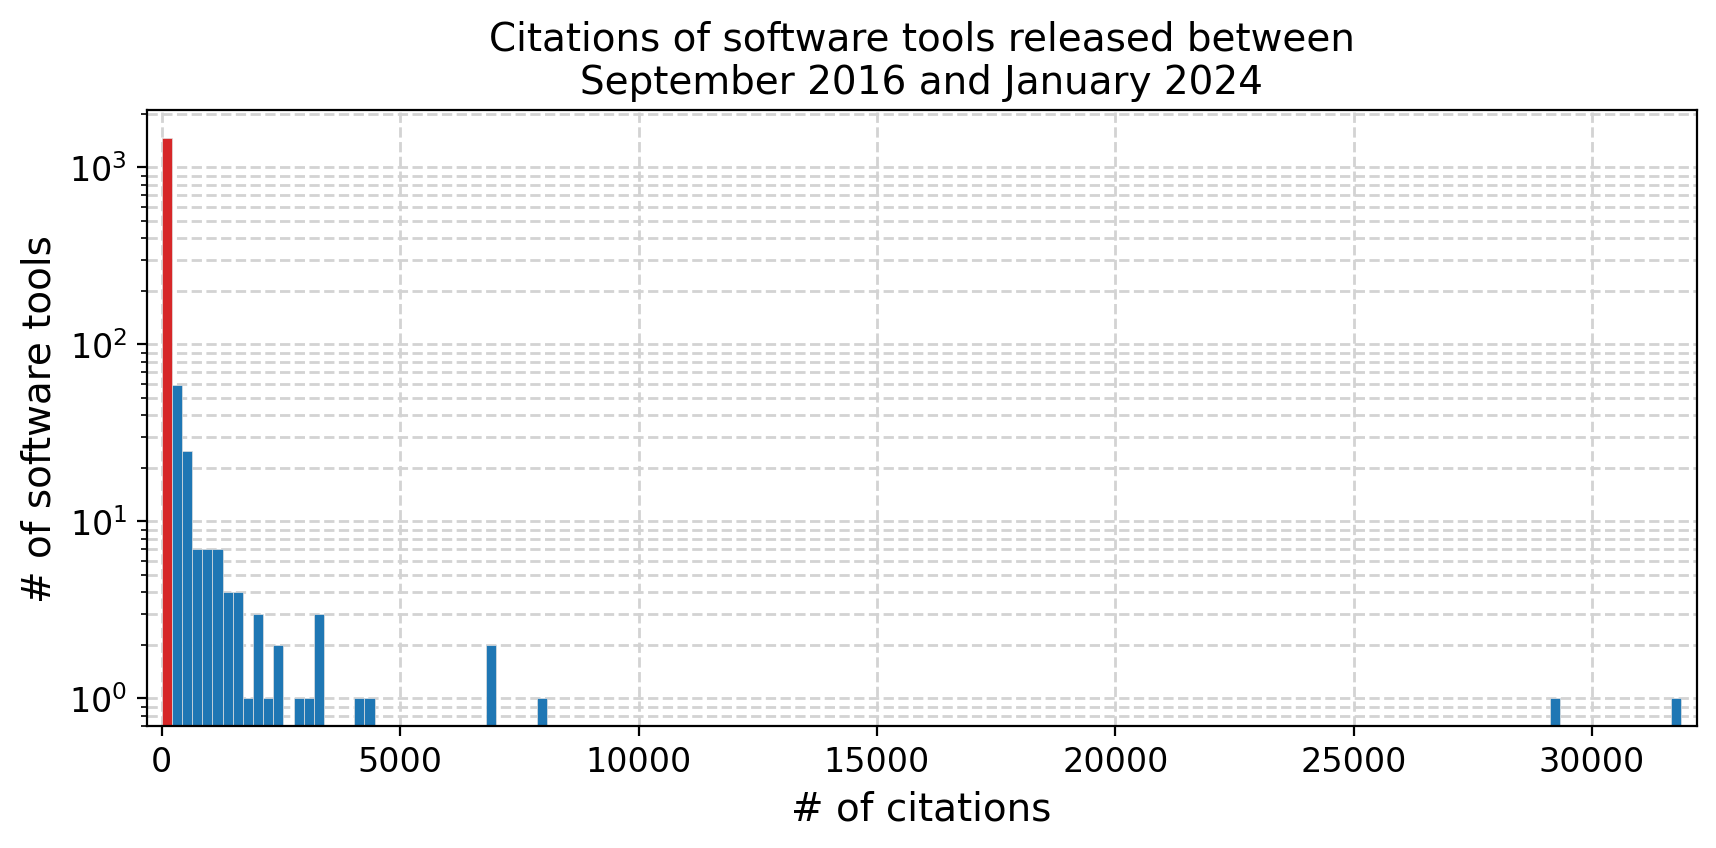

In [4]:
fig,ax = plt.subplots(figsize=(10,4))
fontsize = 14

cit_nums = tool_df["Citations"][tool_df["Citations"] != "'-"].astype(int)


# bins = len(cit_nums.unique())
bins = 150
n, bins, patches = ax.hist(cit_nums, bins=bins, facecolor='tab:blue', edgecolor='#e0e0e0', linewidth=0.25, alpha=1)

# # Add colormap to bins
# n = n.astype('int')
# for i in range(len(patches)):
#     patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# Make 0 citations bin stand out
patches[0].set_fc('tab:red')

ax.set_yscale("log")

ax.set_ylabel("# of software tools", fontsize=fontsize)
ax.set_xlabel("# of citations", fontsize=fontsize)

ax.tick_params(axis="both", labelsize=fontsize-2)
ax.set_title(f"Citations of software tools released between\nSeptember 2016 and January 2024", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.margins(x=0.01)

fig.savefig("citations_histograms.png", dpi=300, bbox_inches="tight")

fig.show()